## Classification

The purpose of this notebook is to start modeling the data! As tiresome as it can be, tidying and exploring our data is a vital component to any data analysis. If we had jumped straight to the modeling step, we would have created a faulty classification model.



## 1. Reading Data

> This section is dedicated to reading the cleaned dataset and importing all libraries.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV



mutation_data_clean = pd.read_csv('data/mutation_data_clean.csv')

# We can extract the data in this format from pandas like this:
all_inputs = mutation_data_clean[['Gender','Age_at_diagnosis','Race','IDH1','TP53','ATRX','PTEN','EGFR','CIC','MUC16','PIK3CA','NF1','PIK3R1','FUBP1','RB1','NOTCH1','BCOR','CSMD3','SMARCA4','GRIN2A','IDH2','FAT4','PDGFRA'
]].values

# Similarly, we can extract the class labels
all_labels = mutation_data_clean['Grade'].values


## 2. Classification

In this section we will create various models using different classification algorithms. In the end we can try to compare these different algorithms using different variables and try to figure out the best model for our use case.  

### 2.1 Decision Tree Classifier

...TBD... Add a short explanation

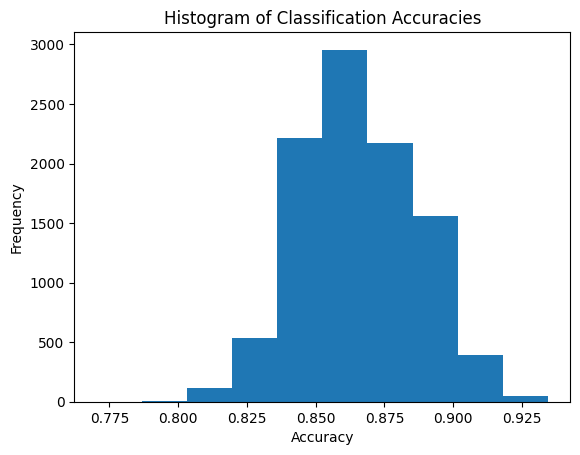

In [2]:
model_accuracies = []

for repetition in range(10000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    # Create the classifier
    classifier = DecisionTreeClassifier()
    
    # Train the classifier on the training set
    classifier.fit(training_inputs, training_classes)
    
    # Validate the classifier on the testing set and append the accuracy to the list
    accuracy = classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(accuracy)

# Plot the histogram of the obtained accuracies
plt.hist(model_accuracies, bins=10)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Histogram of Classification Accuracies')
plt.show()

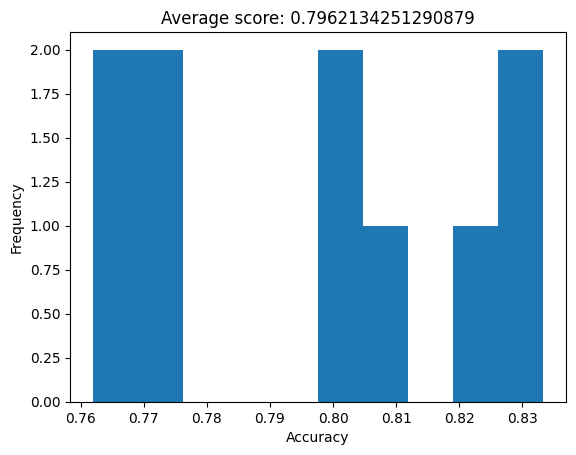

In [30]:
decision_tree_classifier = DecisionTreeClassifier()

# Stratified k-fold cross-validation with 10 splits
cv = StratifiedKFold(n_splits=10)

# cross_val_score returns a list of the scores, which we can visualize
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=cv)

plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

In [41]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {
    'max_depth': range(1, 13),
    'max_features': range(1, 24)
}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(
    estimator=decision_tree_classifier,
    param_grid=parameter_grid,
    cv=cross_validation
)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.868932874354561
Best parameters: {'max_depth': 3, 'max_features': 20}


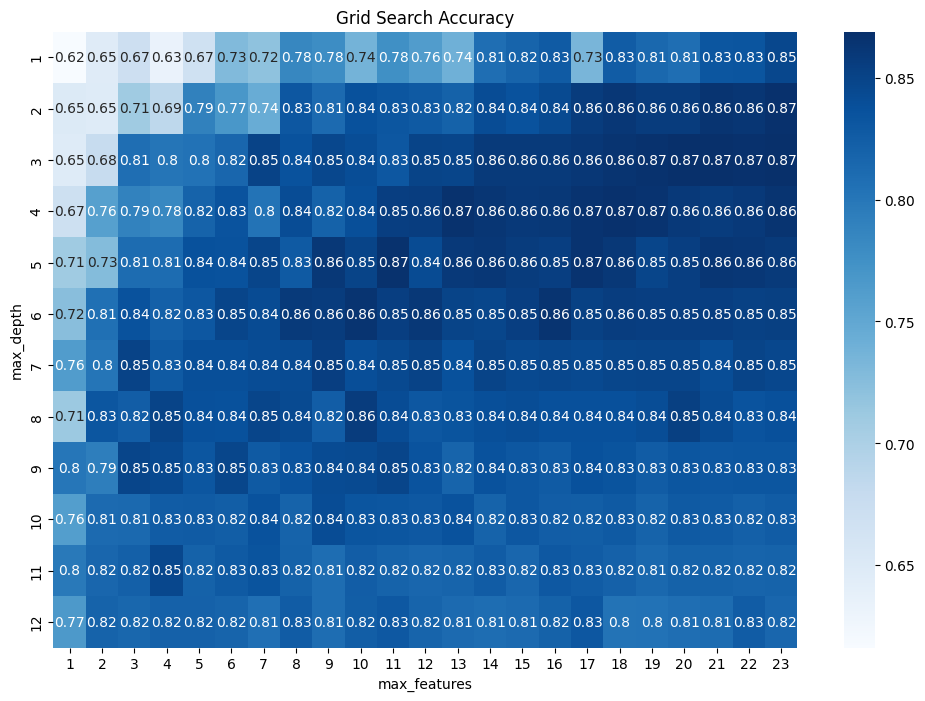

In [43]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (12, 23)  # Update the shape according to the new parameter grid
plt.figure(figsize=(12, 8))  # Adjust the figure size accordingly
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(23) + 0.5, parameter_grid['max_features'])  # Update the ticks accordingly
plt.yticks(np.arange(12) + 0.5, parameter_grid['max_depth'])  # Update the ticks accordingly
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.title('Grid Search Accuracy')
plt.show()

In [44]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [2, 3, 4, 5, 6],
                  'max_features': [9, 10, 11 , 12, 13, 14, 15, 16, 17, 18, 19, 20]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8725186460126221
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 18, 'splitter': 'random'}
